# TruncatedSVD란?
SVD는 행렬을 세 개의 행렬로 분해해서 나온 특이값을 활용해서 데이터를 설명하고, 데이터의 중요도를 판단한다. 특이값이 클수록 데이터의 중요한 부분을 나타내고, 작을수록 덜 중요한 부분을 나타낸다.

TruncatedSVD는 SVD의 변형된 버전이다. SVD는 모든 특이값과 대응하는 벡터를 사용하지만, TruncatedSVD는 상위 몇 개의 중요한 특이값과 그에 대응하는 벡터만 사용한다. 데이터의 중요한 구조를 유지하면서도 차원을 축소할 수 있다는 장점을 가진다.

100 x 100 크기의 행렬을 SVD하게 되면 100개의 특이값이 나온다. 하지만 모든 특이값이 중요한 것은 아니기 때문에 TruncatedSVD는 상위 10개의 특이값만 선택하고 나머지 90개의 특이값은 버리는 방식으로 차원을 축소한다. 선택된 상위 10개의 특이값만 가지고 다시 행렬을 만들면, 원래 데이터의 중요한 정보는 거의 그대로 유지하면서도 행렬의 크기는 100 x 10으로 줄일 수 있는 것이다.

TruncatedSVD는 작은 행렬로 계산할 수 있게 해주니 더 빠르고 효율적이다. 데이터를 압축할 수 있기 때문에 저장 공간을 절약할 수 있다. 덜 중요한 특이값을 제거함으로써 데이터의 노이즈를 줄일 수 있다. (**계산 효율성, 데이터 압축, 노이즈제거**)


따라서, TruncatedSVD는 대규모 행렬의 차원을 축소하거나 데이터를 효율적으로 압축할 때 사용되는 기법이다. 주로 텍스트 마이닝 및 자연어 처리 분야에서 문서-단어 행렬을 분해하는 데 많이 사용된다.

TruncatedSVD에서 n_components 파라미터를 설정함으로써 채택할 특이값의 개수를 지정한다.
몇 개의 특이값(n_components)을 선택할지 결정하는 것은 데이터의 특성과 목적에 따라 다르지만, 일반적인 가이드라인과 실험적인 방법을 통해서 적절한 n_components를 선택할 수 있다.

**총 분산의 비율**을 확인하는 것이 일반적이다. 특이값은 데이터의 분산을 설명한다. 따라서 전체 분산의 90 - 95%를 설명할 수 있는 특이값의 개수를 선택한다. 또는, 데이터와 목적에 따라 다르기 때문에 이미지 데이터의 경우는 이미지 해상도나 복잡성에 따라 다르게 선택할 수도 있다.

## 총 분산 비율 확인

In [6]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

TruncatedSVD에서 분산을 확인하려면 explained_variance_ratio_ 속성을 사용할 수 있다. 이 속성은 각 구성 요소가 설명하는 분산의 비율을 반환한다. 이 그래프를 통해 데이터의 분산을 충분히 설명하는 데 필요한 특이값의 개수를 파악할 수 있다. 

Cumulative Variance Ratio: [0.00049969 0.0033509  0.00618153 0.00898358 0.01176676 0.01453731
 0.01728573 0.02002854 0.02276512 0.0254868  0.02818837 0.03087483
 0.03355177 0.03621705 0.03886518 0.04150606 0.0441355  0.04675682
 0.04936876 0.05197419 0.05456609 0.05715248 0.05973431 0.06229761
 0.06484513 0.06738857 0.0699161  0.07244043 0.07495633 0.07746351
 0.07996626 0.08245638 0.08493464 0.08740538 0.0898588  0.09230926
 0.09475058 0.09718558 0.09960448 0.10201074 0.10440514 0.10679595
 0.10917923 0.11155854 0.11392926 0.1162811  0.11862313 0.12095527
 0.12327737 0.12559534 0.12791034 0.13021719 0.13251737 0.13480737
 0.13708607 0.13936061 0.14162374 0.14387891 0.1461309  0.14836816
 0.15059843 0.15282291 0.15504299 0.15725803 0.15946768 0.16166527
 0.16385878 0.16604265 0.16821922 0.17038492 0.1725485  0.1747028
 0.17684745 0.17898532 0.18111332 0.18323061 0.18534213 0.18744934
 0.18954347 0.19163275 0.19371138 0.1957786  0.19784286 0.19990068
 0.20195128 0.20399928 0.20603581 0.

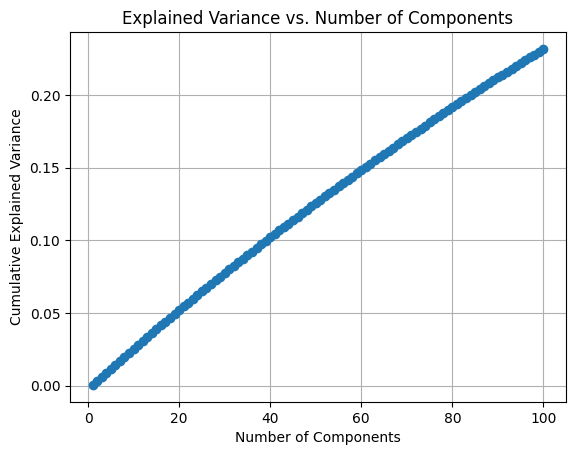

In [10]:
A = np.random.rand(1000, 2000)  # 예시 행렬

# SVD 수행 (상위 100개 특이값 사용)
svd = TruncatedSVD(n_components=100)
svd.fit(A)

# 누적 설명 분산 비율 계산
cumulative_explained_variance = np.cumsum(svd.explained_variance_ratio_)

# 분산 비율 출력
print("Cumulative Variance Ratio:", cumulative_explained_variance)

# 누적 설명 분산 비율 시각화
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

위 코드를 활용하여 해당 지점의 특이값 개수를 n_components로 선택하기 위해 누적 분산 비율이 0.90에 도달하는 지점을 찾을 수 있다.

Selected n_components: 52
Cumulative Explained Variance Ratio: [0.00966281 0.04758167 0.08429427 0.11832203 0.15108165 0.18300164
 0.21333772 0.24299338 0.27084725 0.29778661 0.32383614 0.3491259
 0.37388802 0.39811012 0.42080807 0.44333653 0.46508774 0.4861176
 0.50641025 0.52586309 0.54486538 0.56323542 0.58072534 0.59818161
 0.61449179 0.63053058 0.64648055 0.66219659 0.67715405 0.69149069
 0.70555817 0.71921835 0.732299   0.74458463 0.75633298 0.7675489
 0.77866102 0.78928479 0.79938989 0.80922479 0.81887589 0.82811927
 0.83700411 0.84560288 0.85364648 0.86149941 0.86899637 0.87631231
 0.88307552 0.8897982  0.89619837 0.90247858]


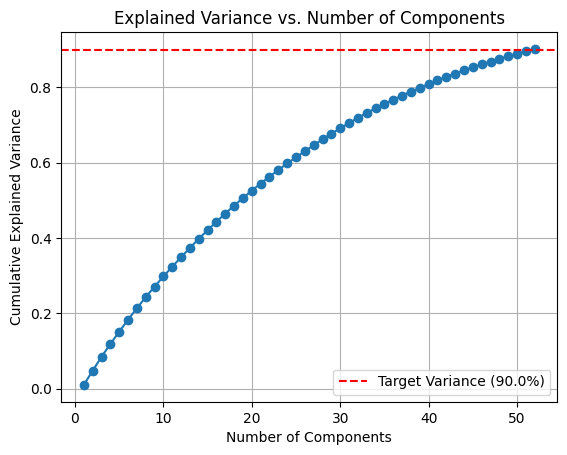

In [12]:
# 예시 데이터
A = np.random.rand(100, 100)

# 목표 누적 설명 분산 비율 설정
target_variance = 0.90

# 최대 n_components 설정 (데이터 크기에 따라 조절)
max_components = min(A.shape)

# 누적 설명 분산 비율을 계산하여 적절한 n_components 찾기
n_components = 1
while n_components < max_components:
    SVD = TruncatedSVD(n_components=n_components)
    SVD.fit(A)
    cumulative_explained_variance = np.cumsum(SVD.explained_variance_ratio_)
    
    if cumulative_explained_variance[-1] >= target_variance:
        break
    n_components += 1

print(f"Selected n_components: {n_components}")
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance)

# 누적 설명 분산 비율 시각화
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.axhline(y=target_variance, color='r', linestyle='--', label=f'Target Variance ({target_variance*100}%)')
plt.legend()
plt.show()
